In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dataset = "SP500.csv"
uploaded = files.upload()
df = pd.read_csv(dataset)

Saving SP500.csv to SP500 (3).csv


In [ ]:
df2 = df.assign(diff=(df.iloc[:, 1].astype(float) - df.iloc[:, 4].astype(float)))
df.head()

         Open     High      Low   Close   Adj Close         Volume   diff
0     5819.68  5847.19  5802.17  5832.92     5832.92  3.879100e+09 -13.24
1     5833.93  5842.92  5823.08  5823.52     5823.52  3.691280e+09  10.41
2     5826.75  5862.82  5799.98  5808.12     5808.12  3.501280e+09  18.63
3     5817.80  5817.80  5784.92  5809.86     5809.86  3.543030e+09   7.94
4     5834.50  5834.85  5762.41  5797.42     5797.42  3.532650e+09  37.08
...       ...      ...      ...      ...         ...           ...    ...
1253  3080.80  3083.95  3072.15  3074.62     3074.62  4.490590e+09   6.18
1254  3078.96  3085.20  3074.87  3078.27     3078.27  4.178040e+09   0.69
1255  3050.72  3066.95  3050.72  3066.91     3066.91  3.956290e+09 -16.19
1256  3046.90  3046.90  3023.19  3037.56     3037.56  4.149310e+09   9.34
1257  3039.74  3050.10  3025.96  3046.77     3046.77  3.779660e+09  -7.03

[1258 rows x 7 columns]


In [ ]:
#Linear Regression
X = df2.iloc[:,1:].astype(float)
y = df.iloc[:, 1].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred[:5])

[4434.94  4702.044 4191.402 4547.496 4400.104]


In [ ]:
# Calculate MSE
LR_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", LR_mse)
# Calculate R-squared
LR_r2 = r2_score(y_test, y_pred)
print("R-squared:", LR_r2)
# Calculate MAE
LR_mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", LR_mae)

Mean Squared Error: 461159.5711788252
R-squared: 0.05743407629907016
Mean Absolute Error: 545.1148095238094


In [ ]:
# Support Vector Machine
SVM_model = SVR(kernel='rbf')
SVM_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred[:5])
SVM_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {SVM_mse}")
SVM_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {SVM_r2}")
SVM_mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", SVM_mae)

[4434.94  4702.044 4191.402 4547.496 4400.104]
Mean Squared Error: 461159.5711788252
R-squared: 0.05743407629907016
Mean Absolute Error: 545.1148095238094


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#K-Nearest Neighbors
KNN_model = KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred[:5])
KNN_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {KNN_mse}")
KNN_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {KNN_r2}")
KNN_mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", KNN_mae)

[4434.94  4702.044 4191.402 4547.496 4400.104]
Mean Squared Error: 461159.5711788252
R-squared: 0.05743407629907016
Mean Absolute Error: 545.1148095238094


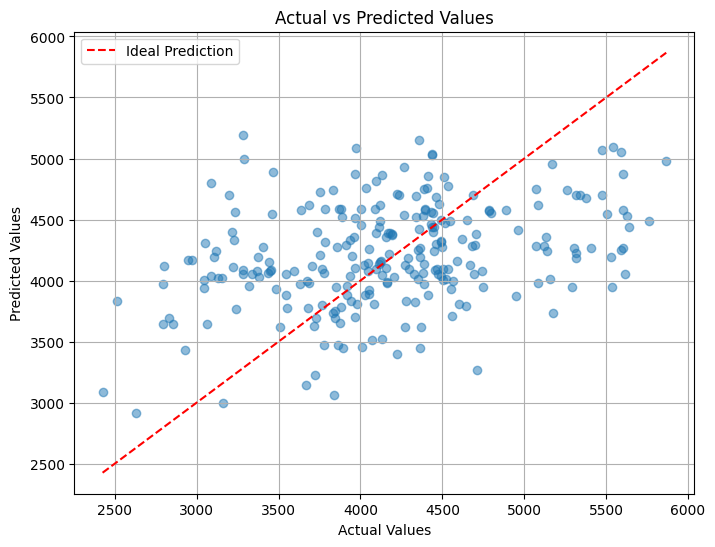

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()